# Analisi discriminante

## Indice

1. [Creare il data set](#dataset)<br>
2. [Analisi discriminante lineare (LDA)](#lda)<br>
    2.1 [Analisi discriminante lineare come algoritmo di riduzione della dimensionalità](#riduzione)<br>
    2.2 [Analisi discriminante lineare come algoritmo di classificazione](#classificazione)<br>
3. [Analisi discriminante quadratica (QDA)](#qda)<br>

In [1]:
import inspect
import matplotlib.pyplot as plt
import numpy as np

%load_ext autoreload
%autoreload 2

# 1. Creare il *data set* <a id=dataset> </a>

In [2]:
from msbd.datasets import crea_normali

print(inspect.getsource(crea_normali))

def crea_normali(medie, cov, num):
    X = np.empty((0, 2), dtype=float)
    y = np.empty((0,), dtype=float)

    for i, (m, c, n) in enumerate(zip(medie, cov, num)):
        X = np.append(X, np.random.multivariate_normal(mean=m, cov=c, size=n),
            axis=0)
        y = np.append(y, i * np.ones(n, dtype=int))

    X, y = shuffle(X, y)

    return X, y



In [3]:
np.random.seed(42)

mu0 = [-0.5, -0.5]
mu1 = [0, 0]
mu2 = [1, 1]
sigma0 = [[0.5, -0.1], 
          [-0.1, 0.5]]
sigma1 = [[0.75, -0.5], 
          [-0.5, 0.75]]
sigma2 = [[1, -0.9], 
          [-0.9, 1]]

X, y = crea_normali(
    medie=[mu0, mu1, mu2],
    cov=[sigma0, sigma1, sigma2],
    num=[100] * 3,
)

### Dividere i dati in *training* e *validation*

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)

### Rappresentare graficamente i dati

In [6]:
from msbd.grafici import grafico_bidimensionale_classi

print(inspect.getsource(grafico_bidimensionale_classi))

def grafico_bidimensionale_classi(X, y, alpha=None, s=None, cm=plt.cm.tab10):
    for i in sorted(np.unique(y.astype(int))):
        plt.scatter(X[y == i, 0], X[y == i, 1], color=cm(i), alpha=alpha, s=s,
                    label="Classe {}".format(i))



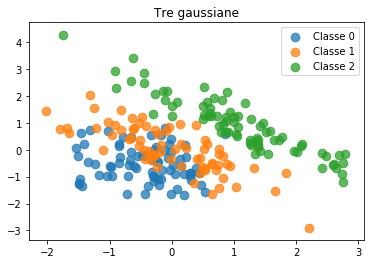

In [7]:
plt.title("Tre gaussiane")

grafico_bidimensionale_classi(X_train, y_train, alpha=0.75, s=75)

plt.legend()
plt.show()

# 2. Analisi discriminante lineare (LDA) <a id=lda> </a>

## 2.1 Analisi discriminante lineare come algoritmo di riduzione della dimensionalità <a id=riduzione> </a>

In [8]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [9]:
pca = PCA(n_components=2)
lda = LinearDiscriminantAnalysis(n_components=2)

X_pca = pca.fit_transform(X_train)
X_lda = lda.fit_transform(X_train, y_train)

### Esercizio

Commentare la differenza tra gli argomenti del metodo `fit()` (e quindi `fit_transform()`) della classe `PCA` e `LinearDiscriminantAnalysis`.

### Confrontare componenti principali e variabili canoniche (o discriminanti)

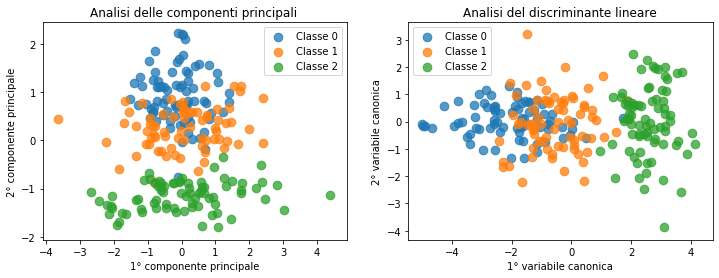

In [10]:
plt.figure(figsize=(12, 4))

plt.subplot(121)
plt.title("Analisi delle componenti principali ")
grafico_bidimensionale_classi(X_pca, y_train, alpha=0.75, s=75)
plt.xlabel("1° componente principale")
plt.ylabel("2° componente principale")
plt.legend()

plt.subplot(122)
plt.title("Analisi del discriminante lineare")
grafico_bidimensionale_classi(X_lda, y_train, alpha=0.75, s=75)
plt.xlabel("1° variabile canonica")
plt.ylabel("2° variabile canonica")
plt.legend()

plt.show()

## 2.2 Analisi discriminante lineare come algoritmo di classificazione <a id=classificazione> </a>

In [11]:
lda = LinearDiscriminantAnalysis()

lda.fit(X_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [12]:
from msbd.grafici import grafico_bidimensionale_classi_previste

print(inspect.getsource(grafico_bidimensionale_classi_previste))

def grafico_bidimensionale_classi_previste(X_train, y_train, X_val, y_val,
        y_pred, nome_clf, alpha=1., s=75, cm=plt.cm.tab10):
    plt.title("Classi previste (accuratezza {}: {:.2f}%)".format(nome_clf, 100 *
        accuracy_score(y_val, y_pred)))

    grafico_bidimensionale_classi(X_train, y_train, alpha=alpha / 3, s=s / 3,
        cm=cm)
    grafico_bidimensionale_classi(X_val, y_val, alpha=alpha, s=s, cm=cm)

    for x, y in zip(X_val, y_pred.astype(int)):
        plt.text(x[0], x[1], y, color="black", fontsize=16)

    plt.legend(["Classe {} ({})".format(c, t) for t in ["train", "val"] for c
        in np.unique(y_train.astype(int))])



### Classificare le osservazioni dell'insieme di *validation*

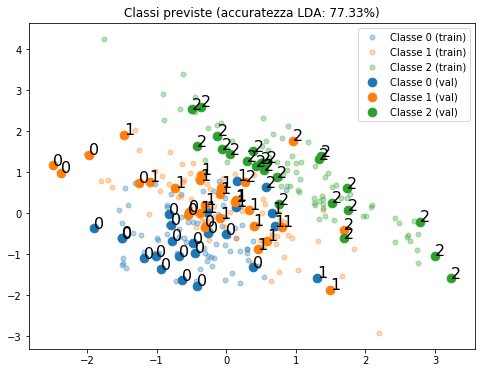

In [13]:
plt.figure(figsize=(8, 6))

grafico_bidimensionale_classi_previste(X_train, y_train, X_val, y_val, lda.predict(X_val), "LDA")

plt.show()

# 3. Analisi discriminante quadratica (QDA) <a id=qda> </a>

In [14]:
qda = QuadraticDiscriminantAnalysis()

qda.fit(X_train, y_train)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

### Classificare le osservazioni dell'insieme di *validation*

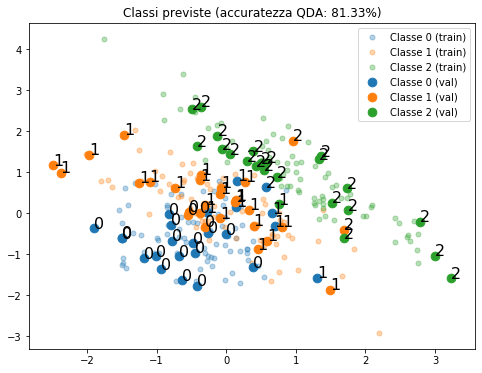

In [15]:
plt.figure(figsize=(8, 6))

grafico_bidimensionale_classi_previste(X_train, y_train, X_val, y_val, qda.predict(X_val), "QDA")

plt.show()

### Esercizio

1. Identificare almeno tre osservazioni classificate incorrettamente da LDA e correttamente da QDA;
2. Motivare come mai, in questo caso, QDA risulta più accurata di LDA. È sempre così?
3. Rieseguire il notebook dopo aver posto `sigma0` e `sigma1` uguali a `sigma2`. Commentare il risultato.

In [16]:
# si veda, ad esempio: https://thatdatatho.com/2018/02/12/linear-vs-quadratic-discriminant-analysis/

### Esercizio

Riprodurre il grafico [Linear and Quadratic Discriminant Analysis with covariance ellipsoid](https://scikit-learn.org/stable/auto_examples/classification/plot_lda_qda.html#sphx-glr-auto-examples-classification-plot-lda-qda-py) utilizzando i dati di questo notebook.

> Nota: nel nostro caso le classi (e quindi le ellissi) sono 3.

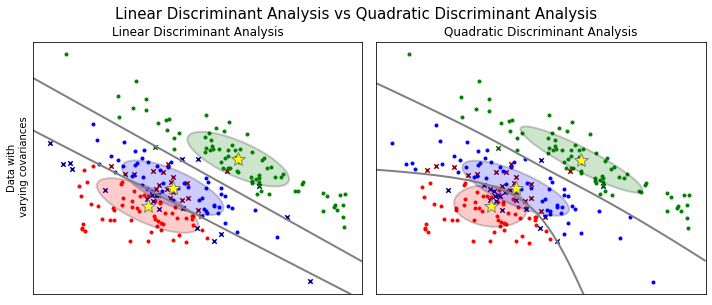

In [17]:
from scipy import linalg
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import colors

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

#cmap = colors.LinearSegmentedColormap.from_list(
#    'red_blue_green_classes', [(0.0, 'red'), (0.66, 'blue'), (1, 'green')])

#plt.cm.register_cmap(cmap=cmap)


# Plot functions
def plot_data(lda, X, y, y_pred, fig_index):
    splot = plt.subplot(2, 2, fig_index)
    if fig_index == 1:
        plt.title('Linear Discriminant Analysis')
        plt.ylabel('Data with\n varying covariances')
    elif fig_index == 2:
        plt.title('Quadratic Discriminant Analysis')
    #elif fig_index == 3:
    #    plt.ylabel('Data with\n varying covariances')

    tp = (y == y_pred)  # True Positive
    tp0, tp1, tp2 = tp[y == 0], tp[y == 1], tp[y == 2]
    X0, X1, X2 = X[y == 0], X[y == 1], X[y == 2]
    X0_tp, X0_fp = X0[tp0], X0[~tp0]
    X1_tp, X1_fp = X1[tp1], X1[~tp1]
    X2_tp, X2_fp = X2[tp2], X2[~tp2]

    # class 0: dots
    plt.scatter(X0_tp[:, 0], X0_tp[:, 1], marker='.', color='red')
    plt.scatter(X0_fp[:, 0], X0_fp[:, 1], marker='x',
                s=20, color='#990000')  # dark red

    # class 1: dots
    plt.scatter(X1_tp[:, 0], X1_tp[:, 1], marker='.', color='blue')
    plt.scatter(X1_fp[:, 0], X1_fp[:, 1], marker='x',
                s=20, color='#000099')  # dark blue
    
    # class 2: dots
    plt.scatter(X2_tp[:, 0], X2_tp[:, 1], marker='.', color='green')
    plt.scatter(X2_fp[:, 0], X2_fp[:, 1], marker='x',
                s=20, color='#006400')  # dark green

    # class 0 and 1 : areas
    nx, ny = 200, 100
    x_min, x_max = plt.xlim()
    y_min, y_max = plt.ylim()
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))
    Z = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    Z = Z[:, 1].reshape(xx.shape)
    #plt.pcolormesh(xx, yy, Z, cmap='red_blue_green_classes',
    #               norm=colors.Normalize(0., 1.), zorder=0)

    plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='grey')

    # means
    plt.plot(lda.means_[0][0], lda.means_[0][1],
             '*', color='yellow', markersize=15, markeredgecolor='grey')
    plt.plot(lda.means_[1][0], lda.means_[1][1],
             '*', color='yellow', markersize=15, markeredgecolor='grey')
    plt.plot(lda.means_[2][0], lda.means_[2][1],
             '*', color='yellow', markersize=15, markeredgecolor='grey')

    return splot

def plot_ellipse(splot, mean, cov, color):
    v, w = linalg.eigh(cov)
    u = w[0] / linalg.norm(w[0])
    angle = np.arctan(u[1] / u[0])
    angle = 180 * angle / np.pi  # convert to degrees
    # filled Gaussian at 2 standard deviation
    ell = mpl.patches.Ellipse(mean, 2 * v[0] ** 0.5, 2 * v[1] ** 0.5,
                              180 + angle, facecolor=color,
                              edgecolor='black', linewidth=2)
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(0.2)
    splot.add_artist(ell)
    splot.set_xticks(())
    splot.set_yticks(())


def plot_lda_cov(lda, splot):
    plot_ellipse(splot, lda.means_[0], lda.covariance_, 'red')
    plot_ellipse(splot, lda.means_[1], lda.covariance_, 'blue')
    plot_ellipse(splot, lda.means_[2], lda.covariance_, 'green')


def plot_qda_cov(qda, splot):
    plot_ellipse(splot, qda.means_[0], qda.covariance_[0], 'red')
    plot_ellipse(splot, qda.means_[1], qda.covariance_[1], 'blue')
    plot_ellipse(splot, qda.means_[2], qda.covariance_[2], 'green')


plt.figure(figsize=(10, 8), facecolor='white')
plt.suptitle('Linear Discriminant Analysis vs Quadratic Discriminant Analysis',
             y=0.98, fontsize=15)

# Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
y_pred = lda.fit(X_train, y_train).predict(X_train)
splot = plot_data(lda, X_train, y_train, y_pred, fig_index=1)
plot_lda_cov(lda, splot)
plt.axis('tight')

# Quadratic Discriminant Analysis
qda = QuadraticDiscriminantAnalysis(store_covariance=True)
y_pred = qda.fit(X_train, y_train).predict(X_train)
splot = plot_data(qda, X_train, y_train, y_pred, fig_index=2)
plot_qda_cov(qda, splot)
plt.axis('tight')
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()